## Visualization for JUST Embeddings using t-SNE

We will import the .embeddings file generated by running JUST, and we project the 128-dimensional vectors down to 2 dimensions using the [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) algorithm.

### Step 1: Loading from .embedding files into Pandas Dataframes

Pandas DataFrames are tables of data that can be created from [many input sources](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html), such as [CSV files](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) and [SQL databases](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File path
embeddings_file = 'JUST_Outputs/dblp.embeddings'

# Initialize lists to store node indexes and embeddings
node_indexes = []
embeddings = []

# Process the embeddings file
with open(embeddings_file, 'r') as file:
    for line in file:
        parts = line.split(maxsplit=1)
        node_indexes.append(parts[0])
        embeddings.append([float(val) for val in parts[1].split()])

# Convert embeddings to DataFrame
embeddings_df = pd.DataFrame(embeddings)

# Assign a new index to the DataFrame
embeddings_df.index = range(1, len(embeddings_df) + 1)

# Check the first few rows of the DataFrame
print(embeddings_df.head())

embeddings_df.shape

#Remove first element from node_indexes list
node_indexes.pop(0)

print(node_indexes) 

#Extract node_indexes list and save as .txt file
# Path where the updated list will be saved
output_file_path = "node_indexes.txt"

# Write the updated list to a file, each node index on a new line
with open(output_file_path, "w") as file:
    for node_index in node_indexes:
        file.write(f"{node_index}\n")

          0         1         2         3         4         5         6    \
1  128.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2    2.062163 -3.822559  3.356310  1.495711  0.147654  4.982532  0.769526   
3    8.755095  3.324619 -0.268750  1.956853  0.033400  1.397121 -5.998192   
4   -0.016692  5.091135  3.150124 -8.831798 -2.781424 -1.588178 -3.017164   
5    0.512313  1.716134  3.903577  4.922825 -0.388932  1.212146 -4.973925   

         7         8         9    ...       118       119       120       121  \
1        NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
2   1.339957  1.357171 -0.542609  ... -1.071640 -0.721320 -4.548015 -6.567608   
3  11.206099  1.390129 -1.581060  ...  2.489887 -3.961385  1.724385 -4.532434   
4  -4.199641  3.244243  4.761934  ...  4.306939  1.667063 -7.785442 -1.921008   
5  -2.483732 -1.679280 -8.647503  ...  1.322175  2.736613  7.367923 -1.163539   

        122       123       124       125       12

In [2]:
# Assuming 'embeddings_df' is your DataFrame
# Drop the first row
embeddings_df = embeddings_df.drop(1)

# Reset the DataFrame index
embeddings_df.reset_index(drop=True, inplace=True)

# Now 'embeddings_df' is ready for further analysis
print(embeddings_df.head())

embeddings_df.shape

        0         1         2         3         4         5         6    \
0  2.062163 -3.822559  3.356310  1.495711  0.147654  4.982532  0.769526   
1  8.755095  3.324619 -0.268750  1.956853  0.033400  1.397121 -5.998192   
2 -0.016692  5.091135  3.150124 -8.831798 -2.781424 -1.588178 -3.017164   
3  0.512313  1.716134  3.903577  4.922825 -0.388932  1.212146 -4.973925   
4 -2.113167 -5.932612  4.734505 -0.371535 -3.220574 -5.085805 -0.017450   

         7         8         9    ...       118       119       120       121  \
0   1.339957  1.357171 -0.542609  ... -1.071640 -0.721320 -4.548015 -6.567608   
1  11.206099  1.390129 -1.581060  ...  2.489887 -3.961385  1.724385 -4.532434   
2  -4.199641  3.244243  4.761934  ...  4.306939  1.667063 -7.785442 -1.921008   
3  -2.483732 -1.679280 -8.647503  ...  1.322175  2.736613  7.367923 -1.163539   
4   1.531176  8.325444  5.257865  ... -2.974113 -5.438767  1.133533  3.574147   

        122       123       124       125       126       127 

(15649, 128)

### Step 2: Generating Node Target List for Color Mapping

In order to generate a color map with a legend for each node type, we need to traverse through the node_indexes list and assign each node to its corresponding node type.

In [3]:
node_targets = ['term' if id.startswith('t') else 'author' if id.startswith('a') else 'paper' if id.startswith('p') else 'venue' for id in node_indexes]

print(node_targets)

['term', 'venue', 'venue', 'venue', 'venue', 'term', 'term', 'term', 'venue', 'venue', 'venue', 'term', 'venue', 'term', 'venue', 'venue', 'term', 'term', 'term', 'term', 'term', 'term', 'term', 'term', 'term', 'venue', 'venue', 'term', 'term', 'term', 'term', 'venue', 'term', 'venue', 'term', 'term', 'paper', 'term', 'term', 'venue', 'term', 'term', 'term', 'term', 'term', 'term', 'term', 'paper', 'term', 'term', 'term', 'term', 'term', 'paper', 'term', 'paper', 'term', 'term', 'term', 'term', 'term', 'term', 'term', 'term', 'venue', 'term', 'term', 'term', 'term', 'term', 'term', 'term', 'term', 'paper', 'term', 'term', 'term', 'author', 'term', 'term', 'venue', 'term', 'venue', 'term', 'term', 'term', 'term', 'term', 'paper', 'paper', 'term', 'author', 'term', 'term', 'term', 'term', 'term', 'paper', 'term', 'term', 'paper', 'term', 'term', 'term', 'term', 'term', 'paper', 'term', 'term', 'paper', 'term', 'term', 'paper', 'paper', 'term', 'paper', 'paper', 'paper', 'paper', 'term', 

### Step 3: Run t-SNE on Embedding DF

In [4]:
from sklearn.manifold import TSNE


transform = TSNE  # PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(embeddings_df)

### Step 4: Creating Color Map and Plotting t-SNE Results

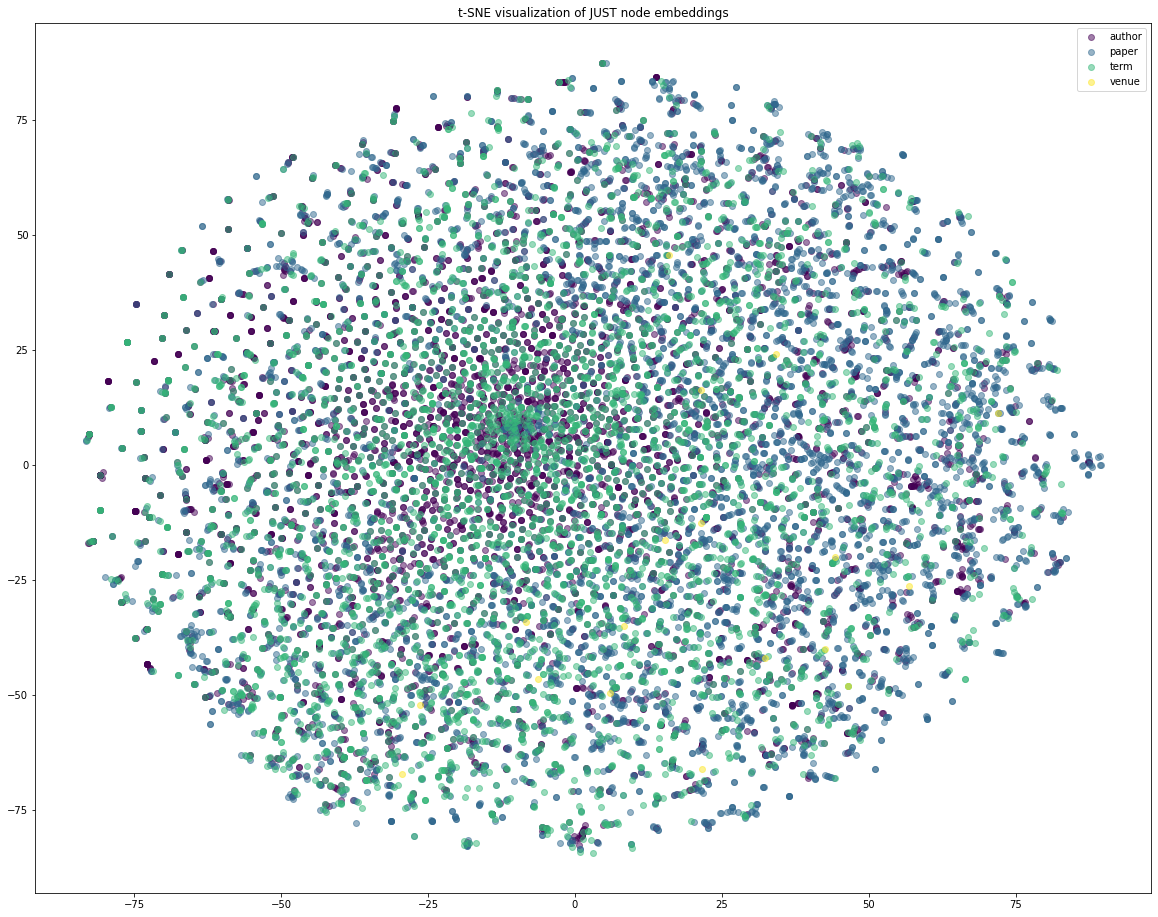

In [5]:

#Create a Color Map
unique_targets = np.unique(node_targets)
colors = plt.cm.get_cmap('viridis', len(unique_targets))  # You can choose different colormaps
label_map = {label: colors(i) for i, label in enumerate(unique_targets)}
node_colours = [label_map[target] for target in node_targets]

#Plotting
plt.figure(figsize=(20, 16))
for target in unique_targets:
    indices = [i for i, x in enumerate(node_targets) if x == target]
    plt.scatter(node_embeddings_2d[indices, 0], node_embeddings_2d[indices, 1], color=label_map[target], label=target, alpha=0.5)

plt.title("t-SNE visualization of JUST node embeddings")
plt.legend(loc='best')  # Adjust the legend location as needed
plt.show()